## This is a rework of HW3_ assignment 2 for the purposes of the authorea analysis. 

This notebook was adapted from the notebook by Jon Toy and Christian Rosada for the purposes of HW6 Authorea submission.
The notebook which was first adapted by Jon Toy from Federica B. Bianco @fedhere

The Idea: 
Younger citi bike users are more likely to take longer trips than older individuals. Younger was measured at less than 40 years of age. 


$H_0$ : The mean trip duration for individuals 40 years of age or under is the same or lower than the mean trip duration for individuals over 40.


$H_a$ : The mean trip duration for individuals 40 years of age or under is higher than the mean trip duration for individuals over 40.

Testing will be down with an $\alpha = 0.05$ significance level.

In [11]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%pylab inline
import csv
import requests
import zipfile


Populating the interactive namespace from numpy and matplotlib


In [12]:
os.getenv("PUIDATA") 

'/home/cusp/dlk253/PUIdata'

In [19]:
#downloading the data
datestring = '201502'
#bring in the citybike data from Feb 2015
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  9959k      0 --:--:-- --:--:-- --:--:-- 14.7M


In [20]:
#unzipping and putting into PUIDATA
zip_ref = zipfile.ZipFile(datestring+"-citibike-tripdata.zip", 'r')
zip_ref.extractall(os.getenv("PUIDATA"))

In [62]:
#opening CSV and plotting the head
df = pd.read_csv(zip_ref.open(datestring+'-citibike-tripdata.csv'))
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [63]:
#dropping all of the columns by column number except for trip duration and birth year
df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11 ,12 ,14]], axis=1,inplace=True)
df.head()

,tripduration,birth year
0,801,1978.0
1,379,1993.0
2,2474,1969.0
3,818,1985.0
4,544,1957.0


In [64]:
#calculating the age
df['age'] = 2016 - df['birth year']

In [65]:
df.tail()

,tripduration,birth year,age
196925,747,1990.0,26.0
196926,204,1971.0,45.0
196927,675,1985.0,31.0
196928,651,1992.0,24.0
196929,636,1995.0,21.0


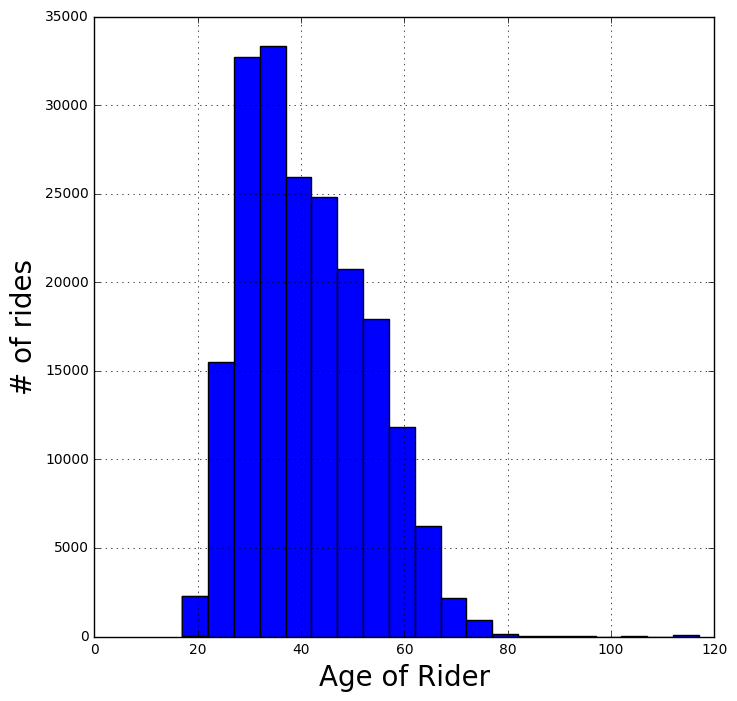

In [81]:
#plotting the mean duration for each age as a histogram, derived from Jon Toy
fig = pl.figure(figsize(8,8))
ax = df['age'].hist(bins=20)
ax.set_ylabel ("# of rides", fontsize = 20)
ax.set_xlabel ("Age of Rider", fontsize = 20)

In [83]:
#this part of the code I got from Christian Rosado and Jon Toy
#also change the trip duration to minutes
df['Over 40'] = (df['age'] > 40)
df['tripdurationmins'] = df['tripduration']/60
df

,tripduration,birth year,age,over 40,Over 40,tripdurationmins
0,801,1978.0,38.0,False,False,13.350000
1,379,1993.0,23.0,False,False,6.316667
2,2474,1969.0,47.0,True,True,41.233333
3,818,1985.0,31.0,False,False,13.633333
4,544,1957.0,59.0,True,True,9.066667
5,717,1979.0,37.0,False,False,11.950000
6,1306,1983.0,33.0,False,False,21.766667
7,913,1955.0,61.0,True,True,15.216667
8,759,1985.0,31.0,False,False,12.650000
9,585,1982.0,34.0,False,False,9.750000


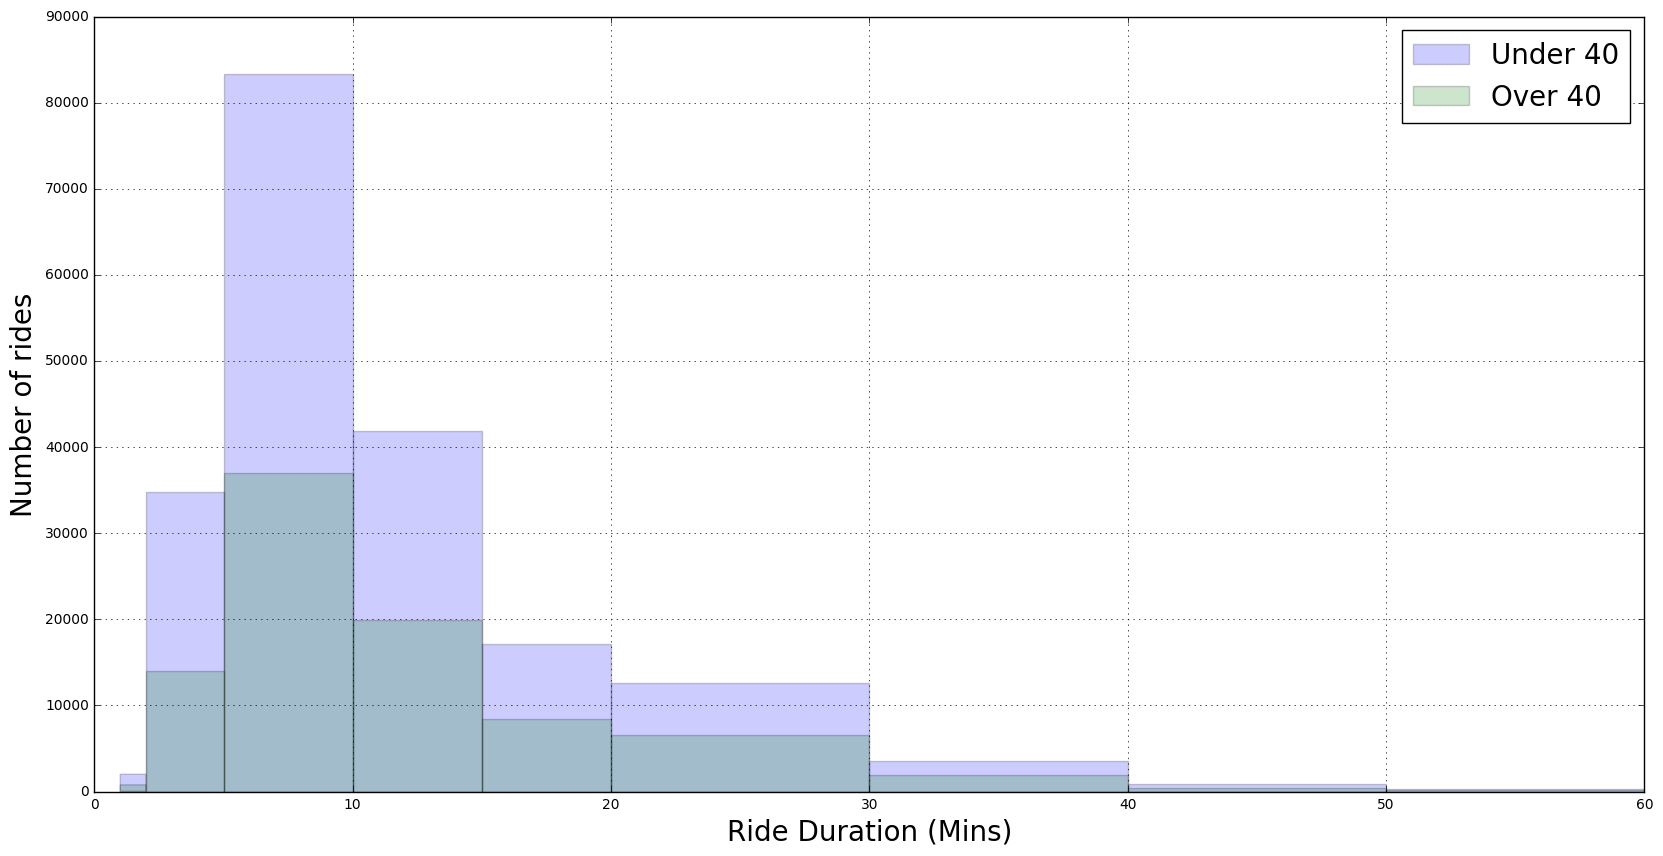

In [88]:
#this part of the code I got from Jon Toy and Christian Rosado

fig = pl.figure(figsize(20,10))
df['tripdurationmins'].hist(bins=[1,2,5,10,15,20,30,40,50,60], alpha=0.2, label = 'Under 40')
ax = (df['tripdurationmins'][df['Over 40'] == 1]).hist(bins=[1,2,5,10,15,20,30,40,50,60], alpha=0.2, label='Over 40')
ax.set_ylabel ("Number of rides", fontsize = 20)
ax.set_xlabel ("Ride Duration (Mins)", fontsize = 20)
pl.legend(['Under 40','Over 40'],fontsize=20)

## The difference seems pretty comparabable

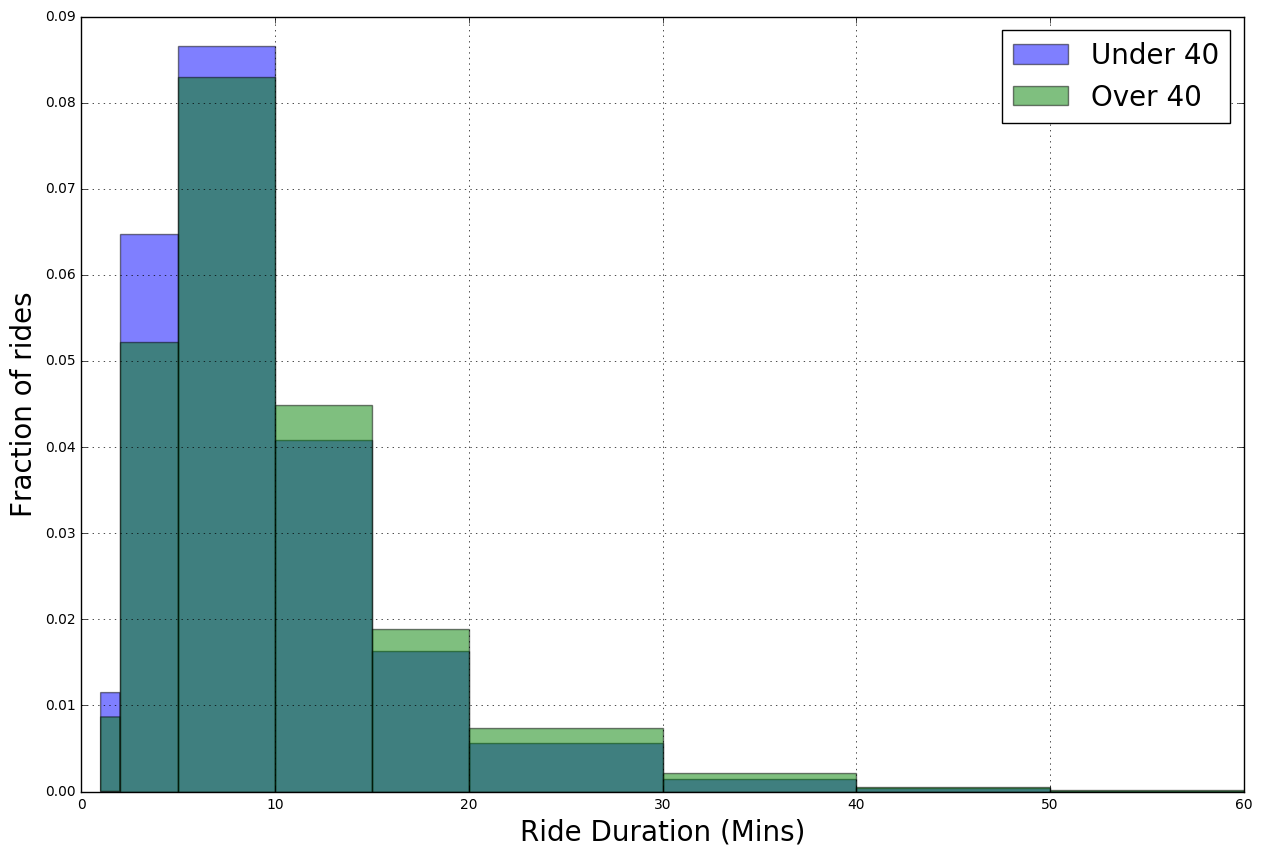

In [89]:
fig = pl.figure(figsize(15,10))
(df['tripdurationmins'][df['Over 40'] == 0]).hist(bins=[1,2,5,10,15,20,30,40,50,60], normed=True, alpha=0.5, label = 'Under 40')
ax = (df['tripdurationmins'][df['Over 40'] == 1]).hist(bins=[1,2,5,10,15,20,30,40,50,60], normed=True, alpha=0.5, label = 'Over 40')
ax.set_ylabel ("Fraction of rides", fontsize = 20)
ax.set_xlabel ("Ride Duration (Mins)", fontsize = 20)
pl.legend(['Under 40','Over 40'],fontsize=20)

## normalized comparison by age, this shows that as the trips get longer or trip > than about ten minutes, the normalization shows a contradiction to what would be expected for H Alternative